In [2]:
import os
import PIL
import torch
import numpy as np
from matplotlib import pyplot as plt
from torchvision import transforms
from models import *
from utils import lab_to_rgb

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
model_file = "final_model_resnet18.pt"

if not os.path.exists(model_file):
    print("{} not found, downloading from Google Drive".format(model_file))
    os.system("pip install gdown")
    #download the trained res34-unet.pt
    os.system("gdown 1F66l9nXex10BRO3XWnZXGMd6YN5RqSHR")

model = torch.load(model_file, map_location=device)
print("Load model complete")

Load model complete


In [4]:
output_folder = "output_images"

if not os.path.isdir(output_folder):
    os.makedirs(output_folder, exist_ok=True)

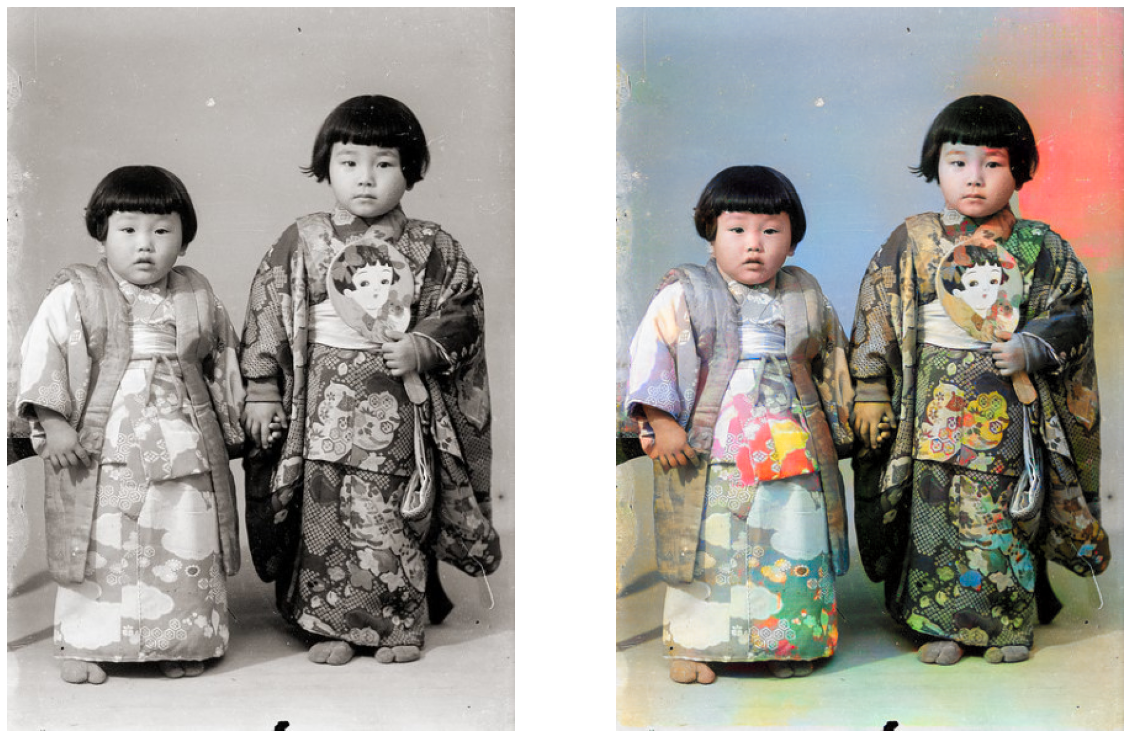

In [21]:
filename = "./test_images/image-8.jpg"
image = PIL.Image.open(filename)
img = image.convert('L')
img = transforms.ToTensor()(img)[:1] * 2. - 1. # to make it between -1 and 1

# image being colourised here
with torch.no_grad():
    preds = model.net_G(img.unsqueeze(0).to(device))

colorized = lab_to_rgb(img.unsqueeze(0), preds.cpu())[0] * 255
colorized = PIL.Image.fromarray(colorized.astype(np.uint8))

fig, axes = plt.subplots(1, 2, figsize=(20,20))
axes[0].imshow(np.asarray(image) / 255)
axes[0].axis('off')
axes[1].imshow(np.asarray(colorized) / 255)
axes[1].axis('off')

# save colourised image to output folder
filename = os.path.basename(filename)
name = filename.split('.')[0]
ext = filename.split('.')[1]
filename = name + "_colourised." + ext
colorized.save(os.path.join(output_folder, filename))